In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [4]:
plt.rc('figure',figsize=(15,15))

AttributeError: shape

In [12]:
iris_dataset = load_iris()

In [14]:
print(iris_dataset.get('DESCR'))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [21]:
print(iris_dataset.get('feature_names'))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
print(iris_dataset.get('target'))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
print(iris_dataset.get('target_names'))

['setosa' 'versicolor' 'virginica']


In [27]:
type(iris_dataset)

sklearn.utils.Bunch

In [36]:
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

In [40]:
df_iris = pd.DataFrame(iris_dataset.data, columns = feature_names)

In [41]:
df_iris['target'] = iris_dataset.get('target')

In [42]:
df_iris

sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]

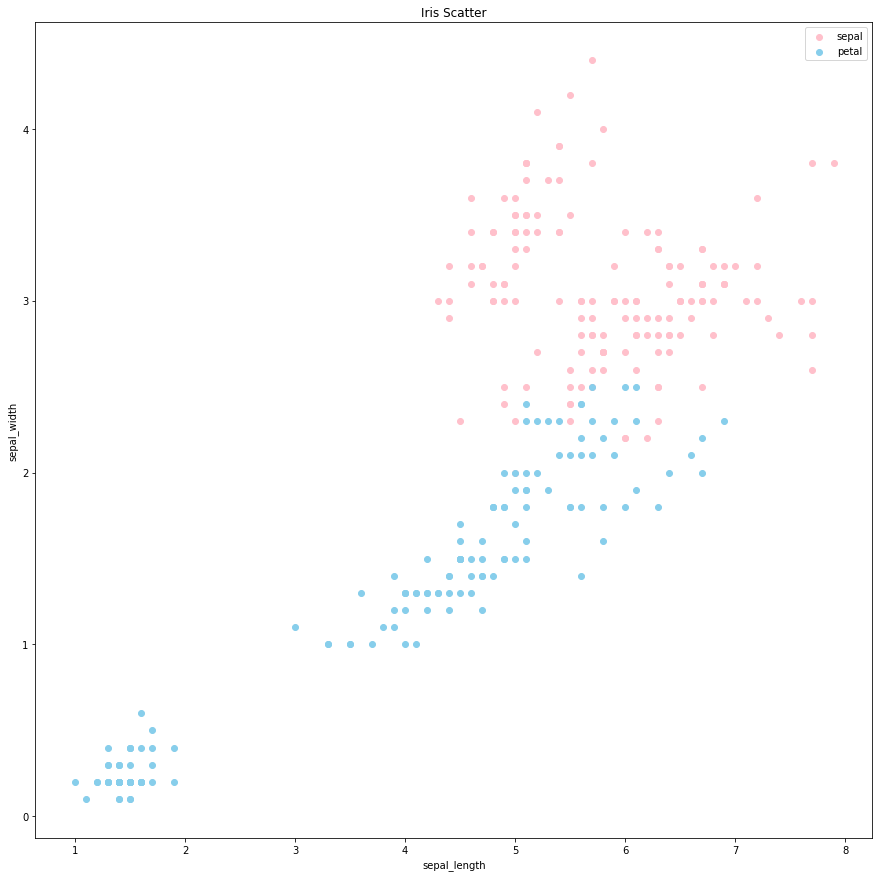

In [51]:
fig, ax = plt.subplots()
ax.set_title('Iris Scatter')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.scatter(df_iris['sepal_length'],df_iris['sepal_width'],label='sepal',color='pink')
ax.scatter(df_iris['petal_length'],df_iris['petal_width'],label='petal',color='skyblue')
ax.legend()
plt.show()

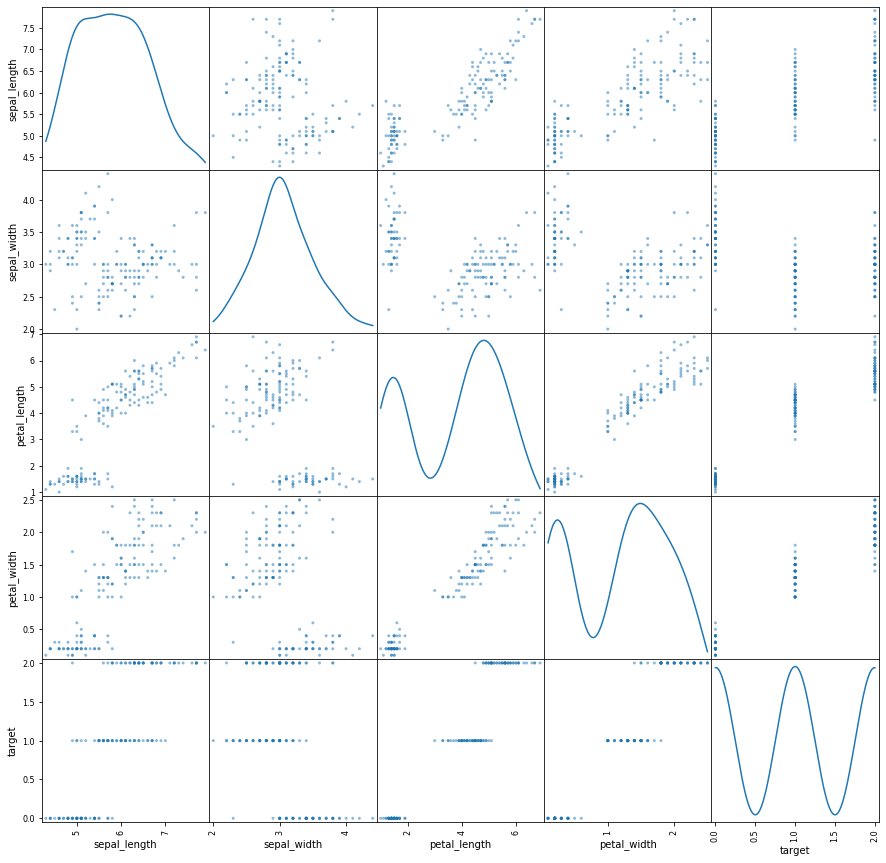

In [53]:
pd.plotting.scatter_matrix(df_iris,diagonal='kde')
plt.show()

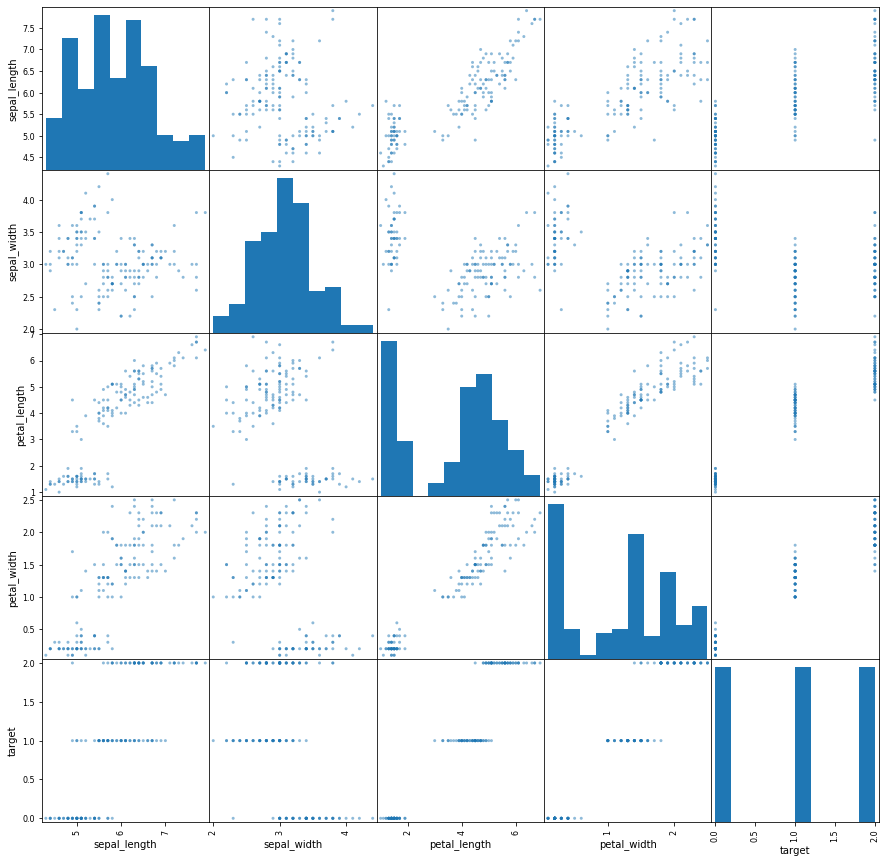

In [54]:
pd.plotting.scatter_matrix(df_iris)
plt.show()

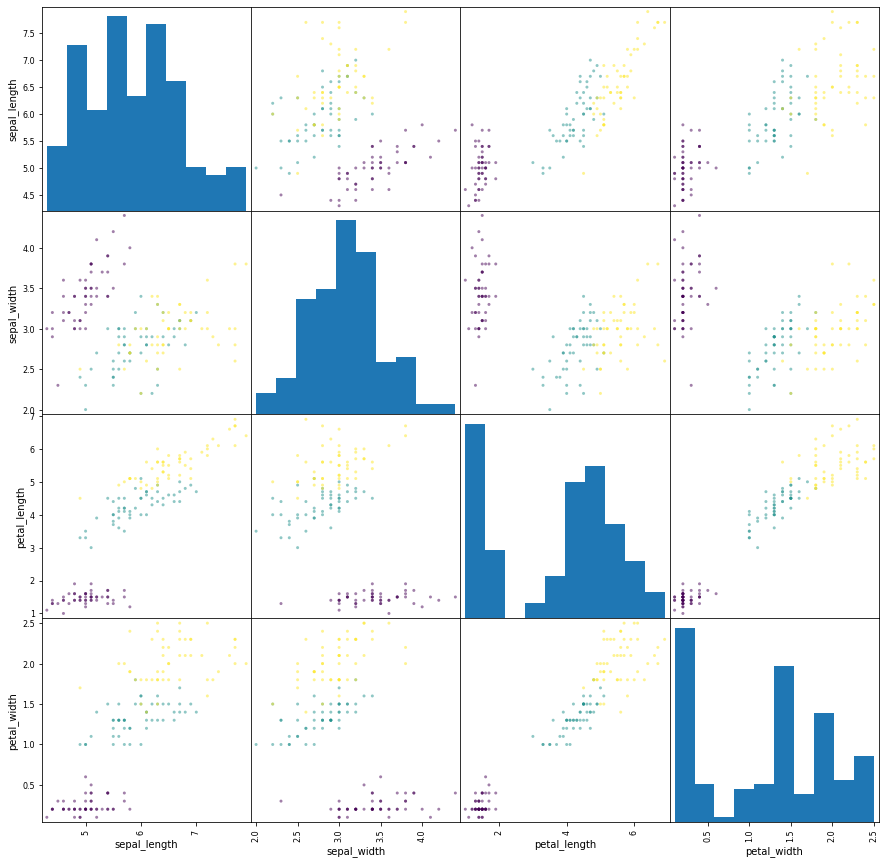

In [55]:
pd.plotting.scatter_matrix(df_iris[feature_names],c=df_iris['target'])
plt.show()

In [56]:
import seaborn as sns

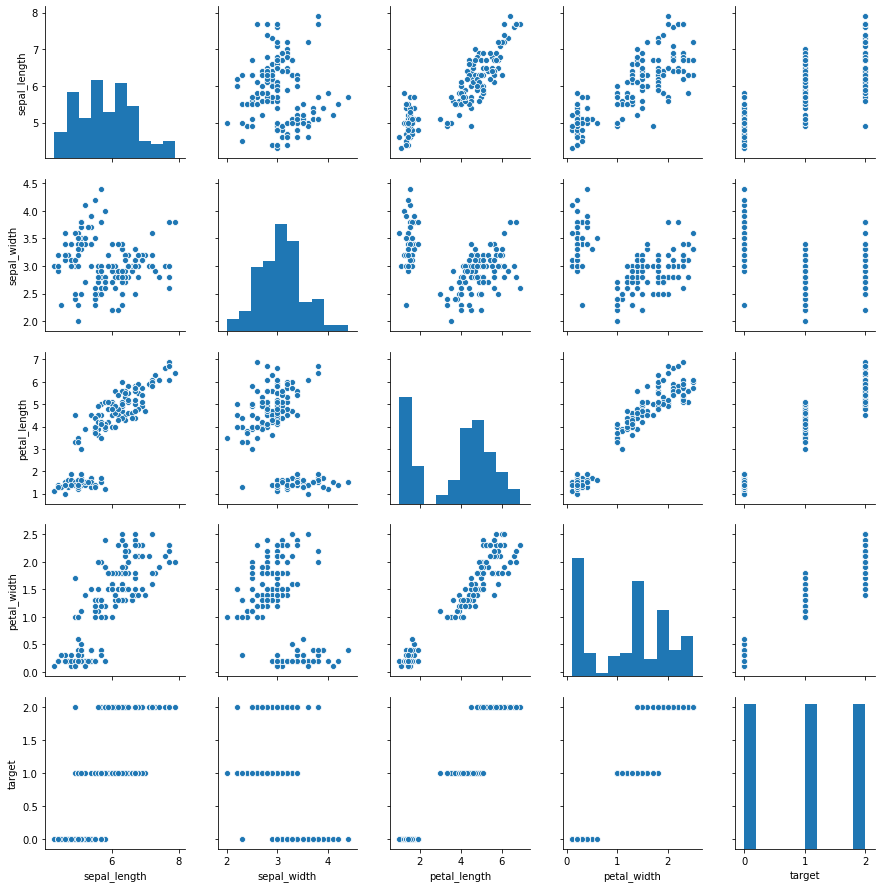

In [60]:
sns.pairplot(df_iris,diag_kind='hist')
plt.show()

C:\Users\46861\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\46861\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


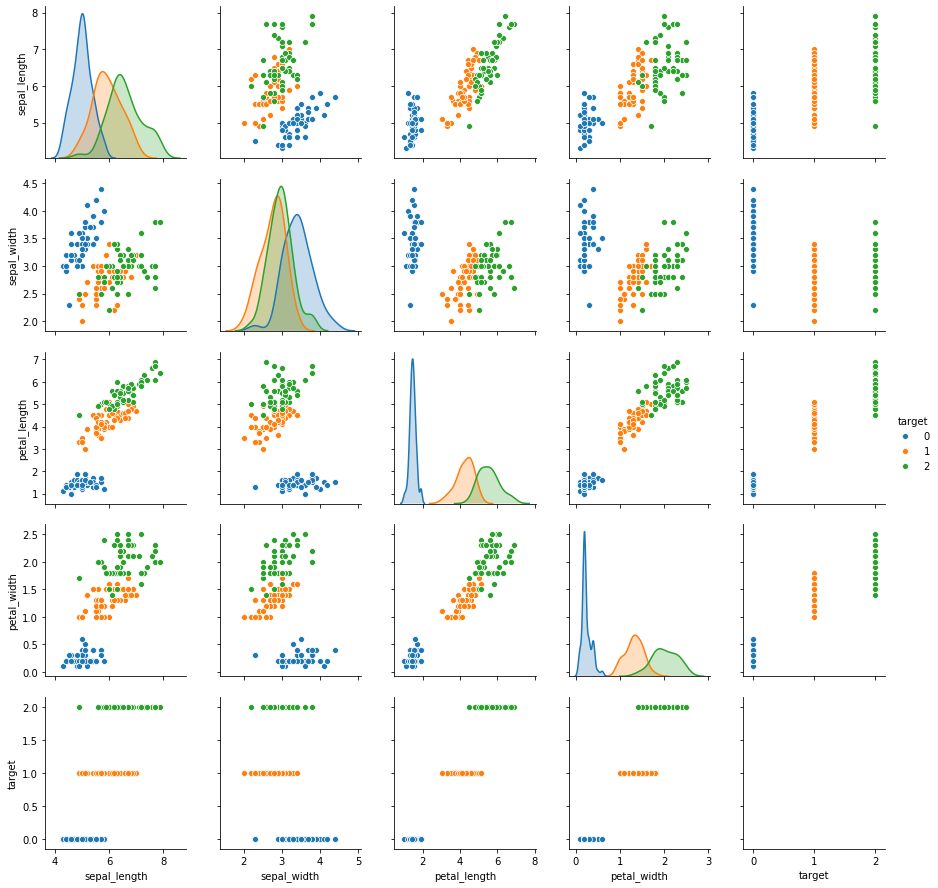

In [61]:
sns.pairplot(df_iris,diag_kind='kde',hue='target')
plt.show()

In [69]:
import plotly.express as px

In [67]:
! pip install "jupyterlab>=3" "ipywidgets>=7.6

^C


In [68]:
!pip install chart_studio

^C


In [70]:
fig = px.scatter_matrix(df_iris,dimensions=feature_names,color='target',width=800,height=800)
fig.show()

In [71]:
from sklearn.preprocessing import StandardScaler

In [75]:
iris_scaler = StandardScaler().fit(df_iris[feature_names])

In [76]:
iris_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
iris_scaler_result = iris_scaler.transform(df_iris[feature_names])

In [79]:
iris_scaler_result.shape

(150, 4)

In [85]:
df_iris_scaler = pd.DataFrame(iris_scaler_result,columns=feature_names)

In [86]:
df_iris_scaler['target'] = df_iris['target']

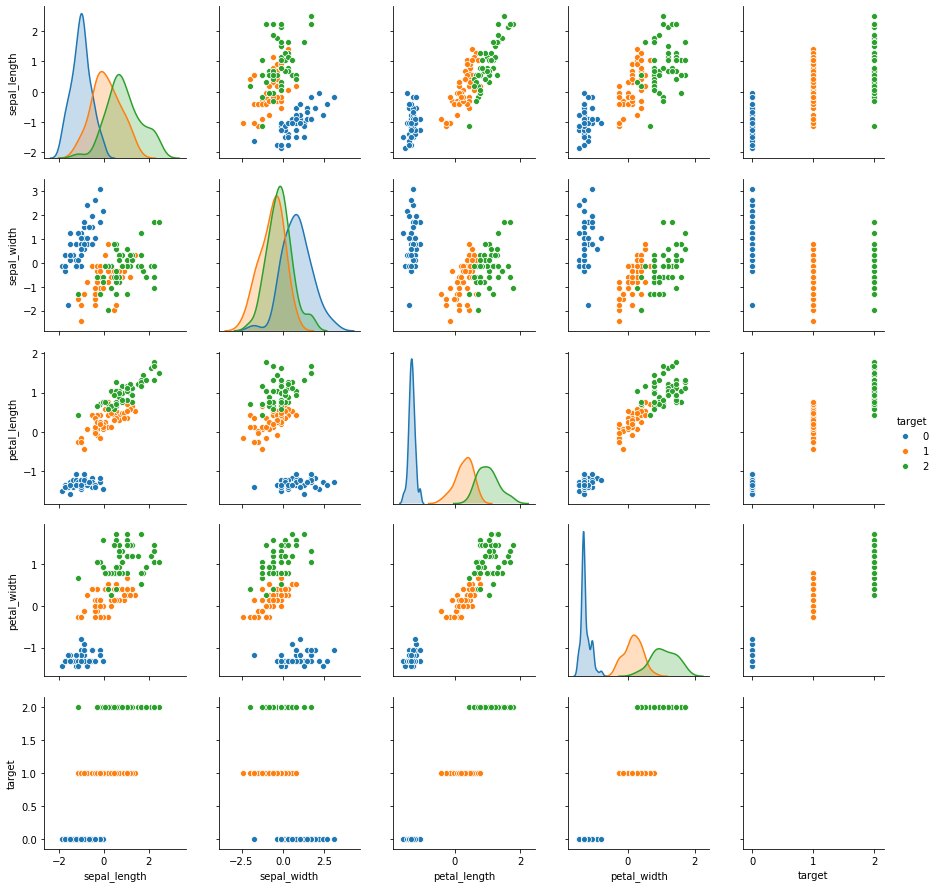

In [88]:
sns.pairplot(df_iris_scaler,diag_kind='kde',hue='target')
plt.show()

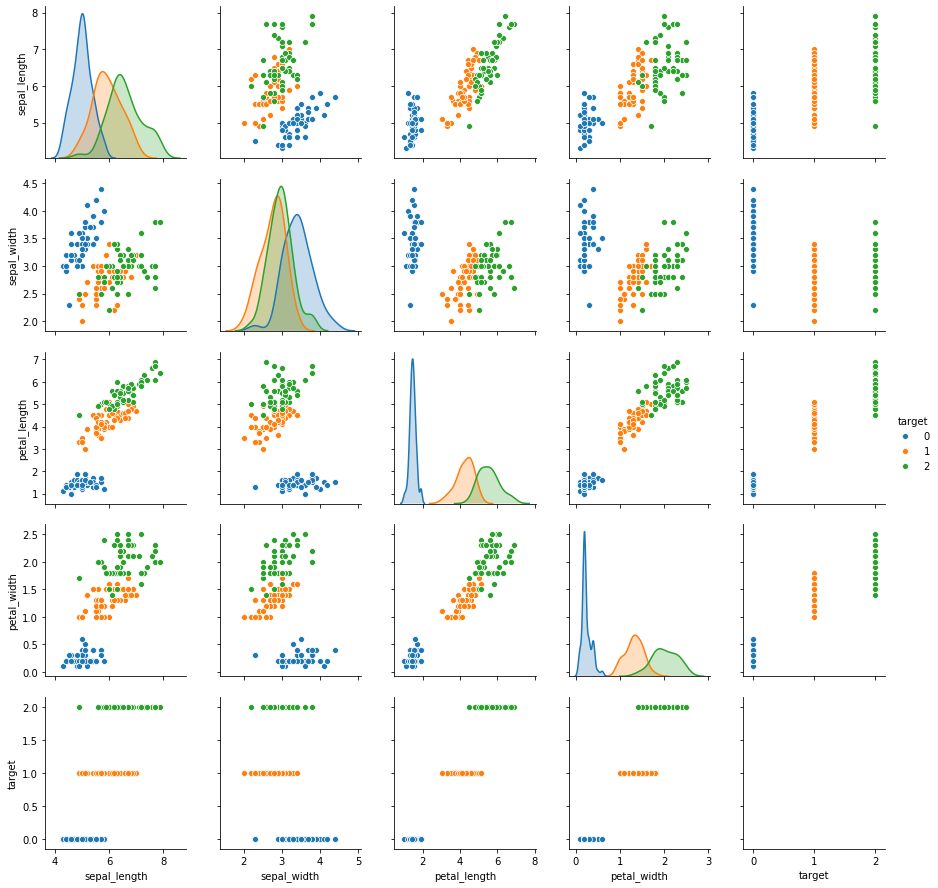

In [89]:
sns.pairplot(df_iris,diag_kind='kde',hue='target')
plt.show()

In [90]:
from sklearn.decomposition import PCA

In [91]:
iris_scale_pca = PCA(2)

In [93]:
iris_pca_trans =  iris_scale_pca.fit_transform(df_iris_scaler[feature_names])

In [98]:
df_iris['pca_x'] = iris_pca_trans[:,0]
df_iris['pca_y'] = iris_pca_trans[:,1]

No handles with labels found to put in legend.


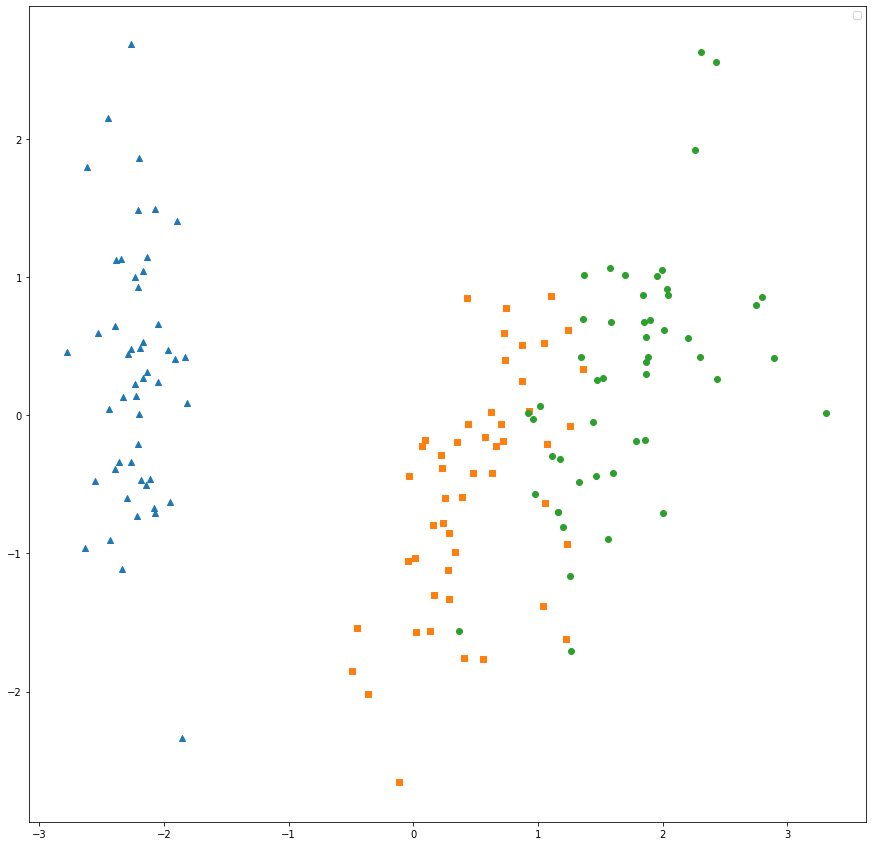

In [101]:
fig, ax = plt.subplots()
markers = ['^','s','o']
for i in range(3):
    x_axis_data = df_iris[df_iris['target']==i]['pca_x']
    y_axis_data = df_iris[df_iris['target']==i]['pca_y']
    ax.scatter(x_axis_data,y_axis_data,marker=markers[i])
ax.legend()
plt.show()

In [103]:
iris_scale_pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [105]:
iris_scale_pca = PCA(3)
iris_pca_trans =  iris_scale_pca.fit_transform(df_iris_scaler[feature_names])
iris_scale_pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [106]:
from sklearn.cluster import KMeans

In [108]:
k_mean = KMeans(n_clusters=3,init='k-means++')
k_mean.fit(df_iris[feature_names])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
df_iris['kmean_cluster'] = k_mean.labels_
df_iris

sepal_length  sepal_width  petal_length  petal_width  target     pca_x  \
0             5.1          3.5           1.4          0.2       0 -2.264703   
1             4.9          3.0           1.4          0.2       0 -2.080961   
2             4.7          3.2           1.3          0.2       0 -2.364229   
3             4.6          3.1           1.5          0.2       0 -2.299384   
4             5.0          3.6           1.4          0.2       0 -2.389842   
..            ...          ...           ...          ...     ...       ...   
145           6.7          3.0           5.2          2.3       2  1.870503   
146           6.3          2.5           5.0          1.9       2  1.564580   
147           6.5          3.0           5.2          2.0       2  1.521170   
148           6.2          3.4           5.4          2.3       2  1.372788   
149           5.9          3.0           5.1          1.8       2  0.960656   

        pca_y  kmean_cluster  
0    0.480027              1  
1   -0.674134              1  
2   -0.341908              1  
3   -0.597395              1  
4    0.646835              1  
..        ...            ...  
145  0.386966              2  
146 -0.896687              0  
147  0.269069              2  
148  1.011254              2  
149 -0.024332              0  

[150 rows x 8 columns]

In [112]:
df_iris.groupby(['target','kmean_cluster'])['sepal_length','sepal_width'].count()

sepal_length  sepal_width
target kmean_cluster                           
0      1                        50           50
1      0                        48           48
       2                         2            2
2      0                        14           14
       2                        36           36

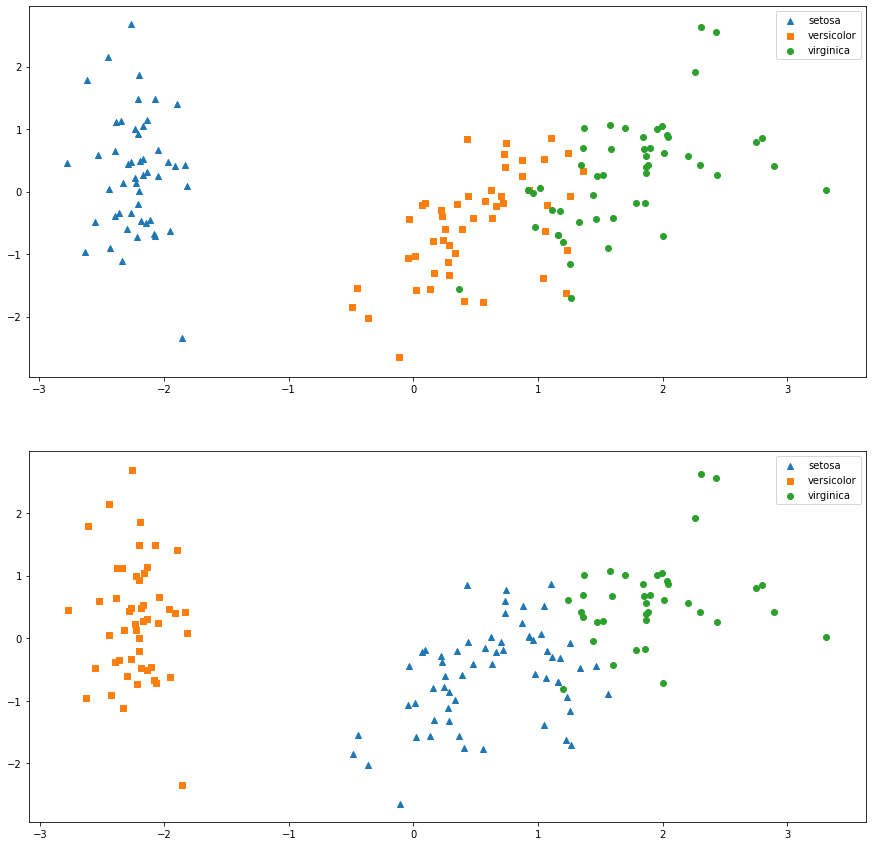

In [118]:
fig, axes = plt.subplots(2,1)
markers = ['^','s','o']
markers_k = ['s','o','^']
for i in range(3):
    x_axis_data = df_iris[df_iris['target']==i]['pca_x']
    y_axis_data = df_iris[df_iris['target']==i]['pca_y']
    axes[0].scatter(x_axis_data,y_axis_data,marker=markers[i],label=iris_dataset.get('target_names')[i])
for i in range(3):
    x_axis_data = df_iris[df_iris['kmean_cluster']==i]['pca_x']
    y_axis_data = df_iris[df_iris['kmean_cluster']==i]['pca_y']
    axes[1].scatter(x_axis_data,y_axis_data,marker=markers[i],label=iris_dataset.get('target_names')[i])
axes[0].legend()
axes[1].legend()
plt.show()

In [120]:
iris_scaler_center = iris_scaler.transform(pd.DataFrame(k_mean.cluster_centers_,columns=feature_names))

In [122]:
iris_scaler_center

array([[ 0.07061611, -0.71118425,  0.36122935,  0.30872701],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.21975656,  0.03763919,  1.12771438,  1.14746315]])

In [123]:
k_mean_center_x = iris_scale_pca.transform(pd.DataFrame(iris_scaler_center,columns=feature_names))[:,:1]

In [124]:
k_mean_center_x

array([[ 0.61240002],
       [-2.22475316],
       [ 1.9281278 ]])

In [125]:
k_mean_center_y = iris_scale_pca.transform(pd.DataFrame(iris_scaler_center,columns=feature_names))[:,1:2]

In [126]:
k_mean_center_y

array([[-0.60046767],
       [ 0.28892745],
       [ 0.59954272]])

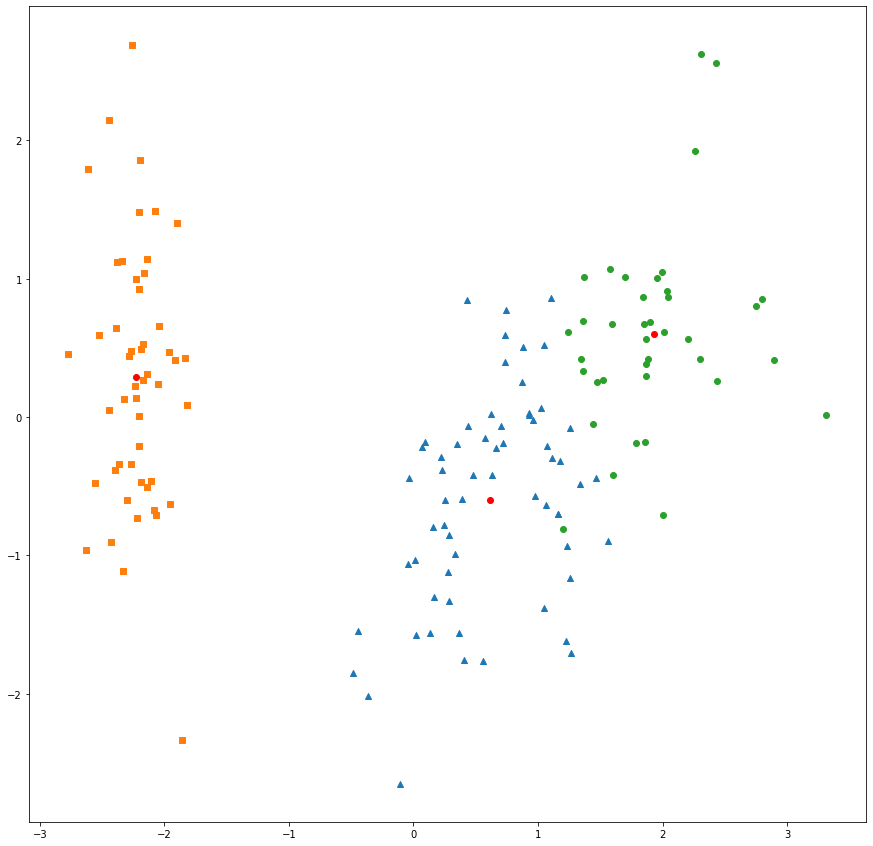

In [130]:
fig, ax = plt.subplots()
markers_k = ['s','o','^']

for i in range(3):
    x_axis_data = df_iris[df_iris['kmean_cluster']==i]['pca_x']
    y_axis_data = df_iris[df_iris['kmean_cluster']==i]['pca_y']
    ax.scatter(x_axis_data,y_axis_data,marker=markers[i],label=iris_dataset.get('target_names')[i])
ax.scatter(k_mean_center_x,k_mean_center_y,c='r')
plt.show()